
# Initial Condition Visualizer

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
def getCoords(index, length):
    y = index // length
    x = index % length
    return (x, y)

def getIndex(x, y, length):
    return x + y*length

In [26]:
length = 10
fname = f"../data/alt_up_down_L{length}.dat"

In [27]:
with open(fname, "r") as ifile:
    lines = ifile.readlines()
    # print(lines)
    if lines[5] == "\n":
        upList = []
    else:
        upList = [int(pointStr) for pointStr in lines[5].split(",")]

    if lines[7] == "\n":
        downList = []
    else:
        downList = [int(pointStr) for pointStr in lines[7].split(",")]

# print("Up:\t", upList)
# print("Down:\t", downList)

In [28]:
if len(upList) > 0:
    xUpList, yUpList = zip(*[getCoords(index, length) for index in upList])
else:
    xUpList = []
    yUpList = []

if len(downList) > 0:
    xDownList, yDownList = zip(*[getCoords(index, length) for index in downList])
else:
    xDownList = []
    yDownList = []

# print(xUpList, yUpList)

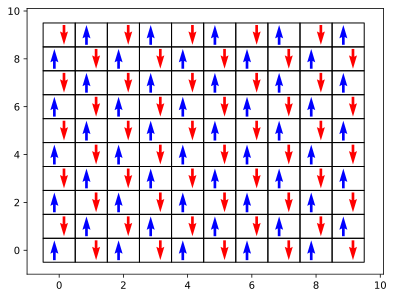

In [29]:
latSpacing = 1
arrowLen = 0.2
adjSpacing = 0.3
rectHeight = 1
rectWidth = 1

fig, ax = plt.subplots()
ax.set_xlim(-1, length+0.1)
ax.set_ylim(-1, length+0.1)
# ax.set_xticks(np.arange(length))
# ax.set_yticks(np.arange(length))


# Up spins (on the left side)
dx = 0
dy = arrowLen
x = np.array(xUpList) - adjSpacing/2
y = np.array(yUpList)
ax.quiver(x, y, dx, dy, angles="xy", color="blue", pivot="middle")

# Down spins
dx = 0
dy = -arrowLen
x = np.array(xDownList) + adjSpacing/2
y = np.array(yDownList)
ax.quiver(x, y, dx, dy, angles="xy", color="red", pivot="middle")

for x in range(length):
    for y in range(length):
        xCorner = x - rectWidth/2
        yCorner = y - rectHeight/2
        rect = mpl.patches.Rectangle((xCorner, yCorner), rectWidth, rectHeight, fill=False)
        ax.add_patch(rect)

plotfilename = "".join((fname.split("/")[-1]).split(".")[:-1])
fig.savefig("../plots/PNGs/" + plotfilename + ".png")
fig.savefig("../plots/PDFs/" + plotfilename + ".pdf")